<a href="https://colab.research.google.com/github/michellehkim280/project_voting/blob/main/VotingProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/carascott/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 63 (delta 3), reused 3 (delta 3), pack-reused 56
Receiving objects: 100% (63/63), 31.36 MiB | 19.76 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
pip install mapclassify

In [10]:
import geopandas as gpd
# import mapclassify
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import zipfile

#gdf = '/content/sample_data/Virginia_AdministrativeBoundary.zip'

#with zipfile.ZipFile(gdf, 'r') as zip_ref:
    #zip_ref.extractall('extracted_contents_directory')

# gdf = gpd.read_file('/content/sample_data/Virginia_AdministrativeBoundary.zip') # Load Virginia shapefile for maps
vdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('/content/project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
#gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
#df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
#del gdf, cdf

#print(vdf)
#print(cdf)

In [19]:
# Standardize FIPS codes to ensure they are five characters long, zero-padded
vdf['county_fips'] = vdf['county_fips'].astype(str).str.zfill(5)

# Remove any rows where critical information is missing
vdf.dropna(subset=['county_fips', 'candidatevotes', 'totalvotes'], inplace=True)

# Convert vote counts to integers (in case they are not)
vdf['candidatevotes'] = vdf['candidatevotes'].astype(int)
vdf['totalvotes'] = vdf['totalvotes'].astype(int)

# Check for any duplicates and remove them
vdf.drop_duplicates(inplace=True)

# Convert certain columns with usable data to lower case for ease
vdf['county_name'] = vdf['county_name'].str.lower()
vdf['candidate'] = vdf['candidate'].str.lower()
vdf['party'] = vdf['party'].str.lower()

# Save cleaned data
#vdf.to_csv('/content/project_voting/data/aaaaaaa.csv', index=False)

In [ ]:
# Cleaning county_data

def load_data(file_path):
    return pd.read_csv(file_path, encoding='ISO-8859-1')

def prepare_data(df):
    # Standardize FIPS codes
    fips_columns = [col for col in ['FIPS', 'county_fips'] if col in df.columns]
    for col in fips_columns:
        df[col] = df[col].astype(str).str.zfill(5)

    # Remove unnecessary columns
    columns_to_drop = [col for col in ['Unneeded1', 'Unneeded2'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # Fill numeric columns with the median
    for col in df.select_dtypes(include='number').columns:
        df[col].fillna(df[col].median(), inplace=True)

    # Fill categorical columns with the mode (most frequent value)
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str)
        if not df[col].mode().empty:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Remove rows with missing FIPS codes if critical
    df.dropna(subset=fips_columns, inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    return df

# Directory to save cleaned files
output_directory = '/content/project_voting/data/county_data/cleaned'
os.makedirs(output_directory, exist_ok=True)

# Paths to the county data files
files = [
    '/content/project_voting/data/county_data/cleaned/0002_ds176_20105_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds177_20105_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds191_20125_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds206_20145_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds225_20165_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds239_20185_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds249_20205_county_E.csv',
    '/content/project_voting/data/county_data/cleaned/0002_ds250_20205_county_E.csv'
]

# Load, clean, and save each file
for file_path in files:
    df = load_data(file_path)
    cleaned_df = prepare_data(df)
    cleaned_file_path = os.path.join(output_directory, os.path.basename(file_path).replace('.csv', '_cleaned.csv'))
    cleaned_df.to_csv(cleaned_file_path, index=False)

In [8]:
#for column_name in vdf.columns.tolist():
    #print(column_name)
#year (NUM)
#state
#state_po
#county_name
#county_fips (NUM)
#office
#candidate
#party
#candidatevotes (NUM)
#totalvotes (NUM)
#version (NUM)
#mode
#for column_name in cdf.columns.tolist():
    #print(column_name)
#County
#Population2022 (NUM)
#FIPS (NUM)
#District (NUM)
#N1
#N2
#N3
#N4
#N5
#N6
#N7
#N8
#N9
#N10
#N11
#N12

In [36]:
vdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,candidate_numeric
0,11161,2000,VIRGINIA,VA,accomack,51001,US PRESIDENT,al gore,democrat,5092,11925,20220315,TOTAL,0
1,11162,2000,VIRGINIA,VA,accomack,51001,US PRESIDENT,george w. bush,republican,6352,11925,20220315,TOTAL,1
2,11163,2000,VIRGINIA,VA,accomack,51001,US PRESIDENT,ralph nader,green,220,11925,20220315,TOTAL,2
3,11164,2000,VIRGINIA,VA,accomack,51001,US PRESIDENT,other,other,261,11925,20220315,TOTAL,3
4,11165,2000,VIRGINIA,VA,albemarle,51003,US PRESIDENT,al gore,democrat,16255,36846,20220315,TOTAL,0


In [57]:
vdf_filtered = vdf[['candidate', 'party', 'candidatevotes', 'year', 'county_name']]

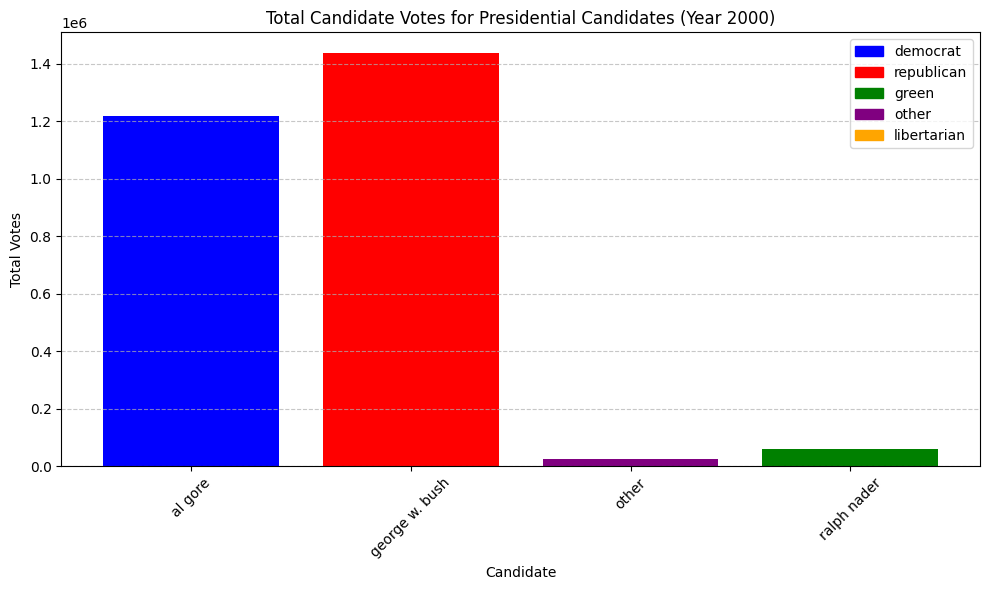

In [79]:
# 2000: Filter the DataFrame for the election year
vdf_2000 = vdf_filtered[vdf_filtered['year'] == 2000]
total_candidate_votes = vdf_2000.groupby('candidate')['candidatevotes'].sum()
#print(total_candidate_votes)
#print(vdf_2000)

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}

plt.figure(figsize=(10, 6))
for candidate, votes in total_candidate_votes.items():
    party_color = color_map[vdf[vdf['candidate'] == candidate]['party'].iloc[0]]
    plt.bar(candidate, votes, color=party_color)
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper right')
plt.title('Total Candidate Votes for Presidential Candidates in Virginia (Year 2000)')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

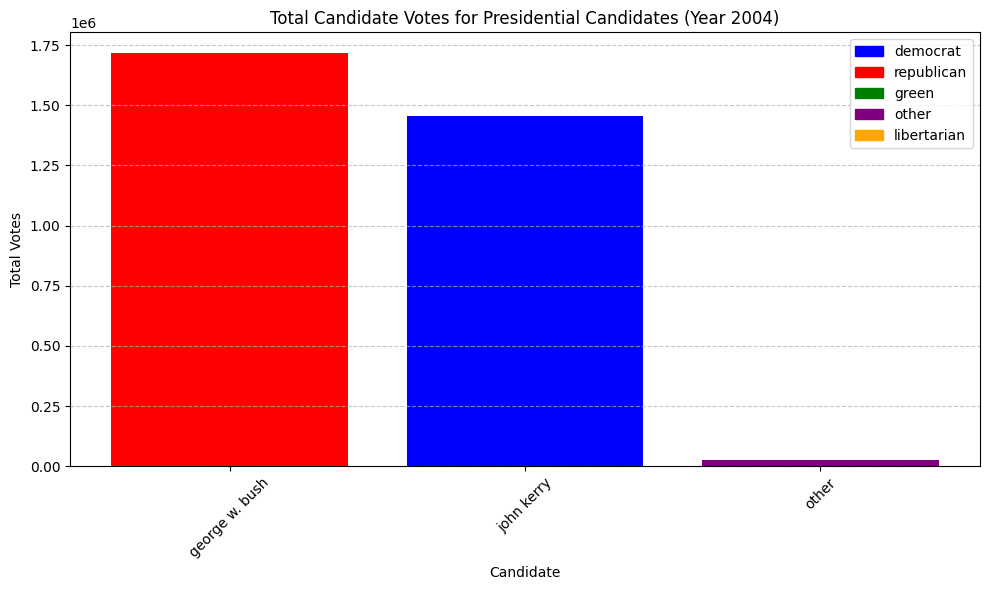

In [80]:
# 2004: Filter the DataFrame for the election year
vdf_2004 = vdf_filtered[vdf_filtered['year'] == 2004]
total_candidate_votes = vdf_2004.groupby('candidate')['candidatevotes'].sum()

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}

plt.figure(figsize=(10, 6))
for candidate, votes in total_candidate_votes.items():
    party_color = color_map[vdf[vdf['candidate'] == candidate]['party'].iloc[0]]
    plt.bar(candidate, votes, color=party_color)
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper right')
plt.title('Total Candidate Votes for Presidential Candidates in Virginia (Year 2004)')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

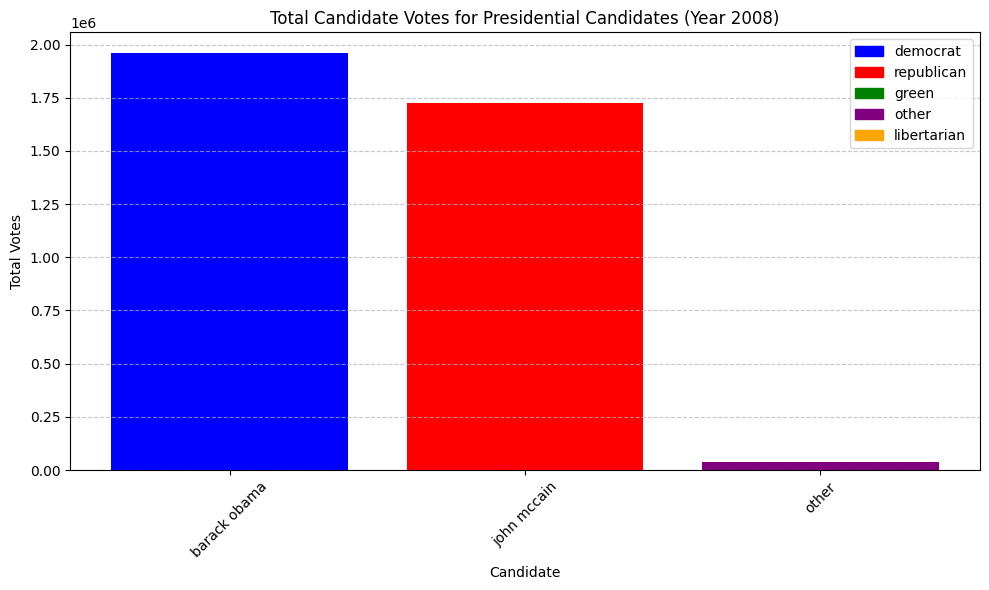

In [81]:
# 2008: Filter the DataFrame for the election year
vdf_2008 = vdf_filtered[vdf_filtered['year'] == 2008]
total_candidate_votes = vdf_2008.groupby('candidate')['candidatevotes'].sum()

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}

plt.figure(figsize=(10, 6))
for candidate, votes in total_candidate_votes.items():
    party_color = color_map[vdf[vdf['candidate'] == candidate]['party'].iloc[0]]
    plt.bar(candidate, votes, color=party_color)
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper right')
plt.title('Total Candidate Votes for Presidential Candidates in Virginia (Year 2008)')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

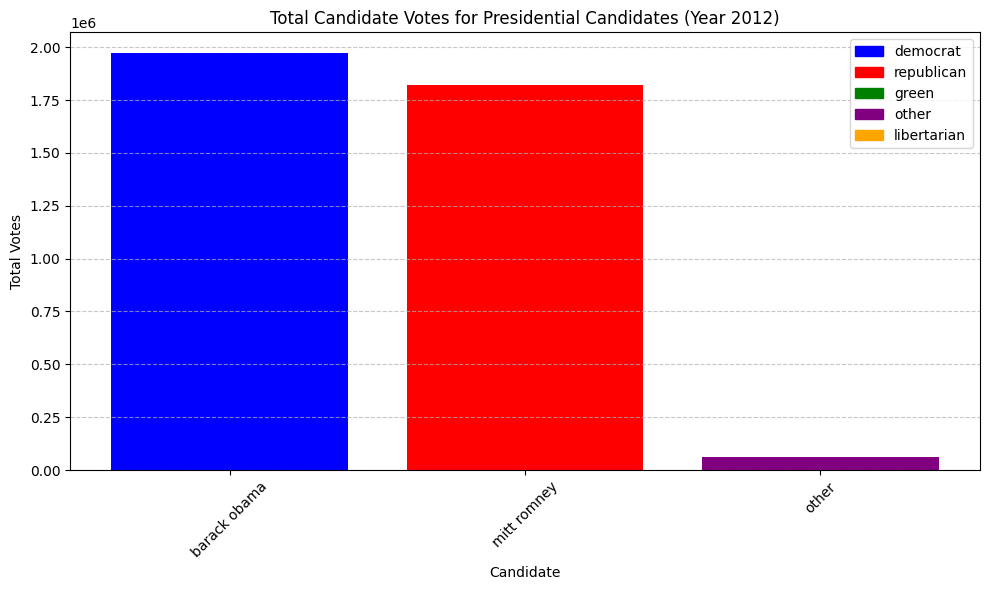

In [83]:
# 2012: Filter the DataFrame for the election year
vdf_2012 = vdf_filtered[vdf_filtered['year'] == 2012]
total_candidate_votes = vdf_2012.groupby('candidate')['candidatevotes'].sum()

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}

plt.figure(figsize=(10, 6))
for candidate, votes in total_candidate_votes.items():
    party_color = color_map[vdf[vdf['candidate'] == candidate]['party'].iloc[0]]
    plt.bar(candidate, votes, color=party_color)
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper right')
plt.title('Total Candidate Votes for Presidential Candidates in Virginia (Year 2012)')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

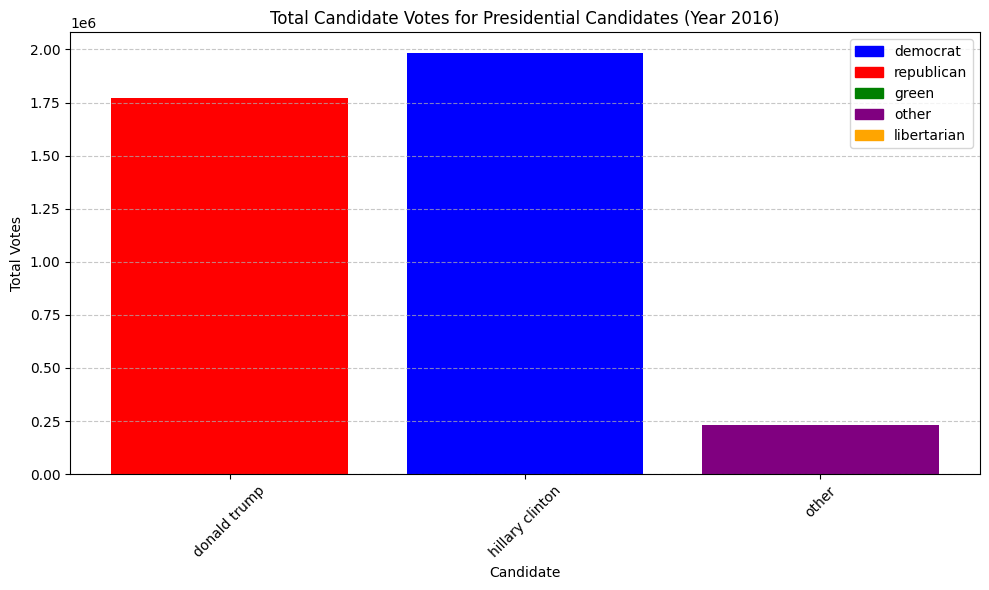

In [84]:
# 2016: Filter the DataFrame for the election year
vdf_2016 = vdf_filtered[vdf_filtered['year'] == 2016]
total_candidate_votes = vdf_2016.groupby('candidate')['candidatevotes'].sum()

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}

plt.figure(figsize=(10, 6))
for candidate, votes in total_candidate_votes.items():
    party_color = color_map[vdf[vdf['candidate'] == candidate]['party'].iloc[0]]
    plt.bar(candidate, votes, color=party_color)
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper right')
plt.title('Total Candidate Votes for Presidential Candidates in Virginia (Year 2016)')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

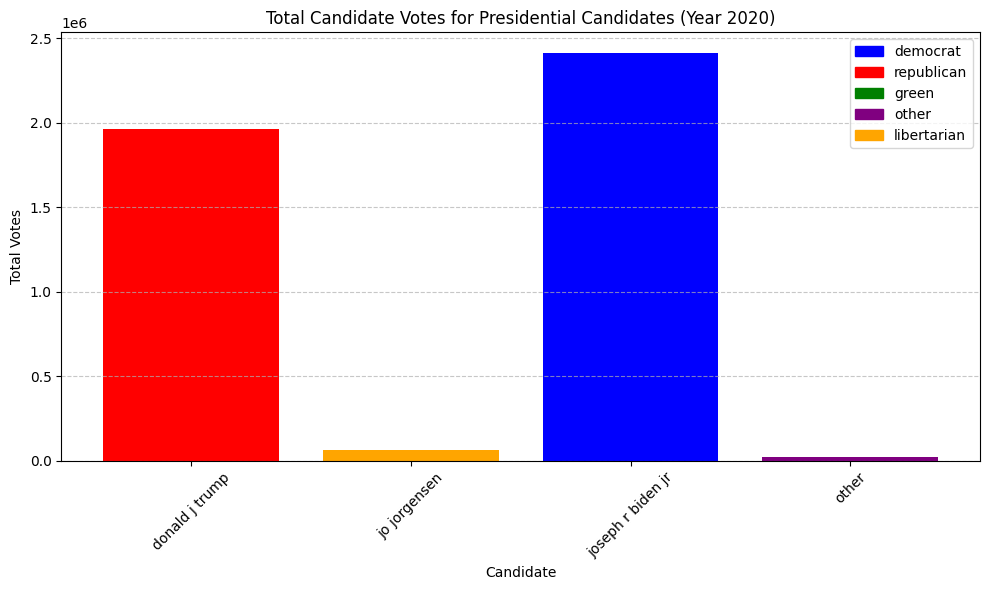

In [85]:
# 2020: Filter the DataFrame for the election year
vdf_2020 = vdf_filtered[vdf_filtered['year'] == 2020]
total_candidate_votes = vdf_2020.groupby('candidate')['candidatevotes'].sum()

color_map = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}

plt.figure(figsize=(10, 6))
for candidate, votes in total_candidate_votes.items():
    party_color = color_map[vdf[vdf['candidate'] == candidate]['party'].iloc[0]]
    plt.bar(candidate, votes, color=party_color)
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_labels, color_map.keys(), loc='upper right')
plt.title('Total Candidate Votes for Presidential Candidates in Virginia (Year 2020)')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-115-742707595a6e>:12: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=albemarledf, x='year', y='candidatevotes', hue="party", palette=party_colors, fill=True)


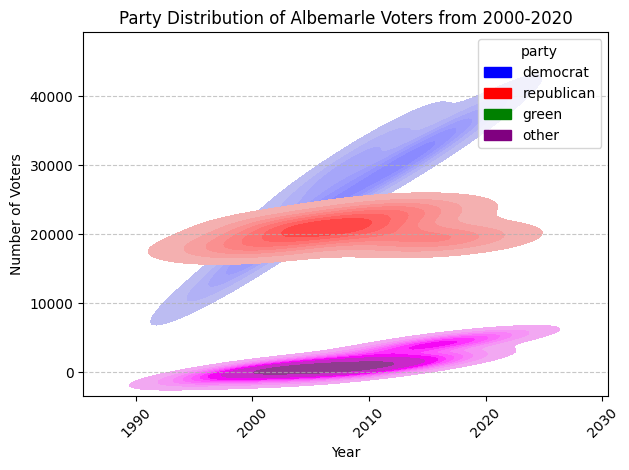

In [115]:
# Showing party distribution of Albemarle voters over time
albemarledf = vdf_filtered[(vdf_filtered['county_name'] == 'albemarle') & (vdf_filtered['year'].isin(range(2000,2020)))]
#print(albemarledf)

party_colors = {
    'democrat': 'blue',
    'republican': 'red',
    'green': 'green',
    'other': 'purple',
    'libertarian': 'orange'
}
sns.kdeplot(data=albemarledf, x='year', y='candidatevotes', hue="party", palette=party_colors, fill=True)
plt.title('Party Distribution of Albemarle Voters from 2000-2020')
plt.xlabel("Year")
plt.ylabel("Number of Voters")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
vdf_y = vdf[vdf[year] == 2012]
candidate_counts = vdf_y[candidate].value_counts()
print("Number of votes for each candidate in the year 2000:")
print(candidate_counts)

Number of votes for each candidate in the year 2000:
candidate
barack obama    134
mitt romney     134
other           134
Name: count, dtype: int64


In [30]:
unique_responses = vdf_y['year'].value_counts()
print(unique_responses)
na_count = vdf_y['year'].isna().sum()
print(f"Number of NAs: {na_count}")

year
2000    536
Name: count, dtype: int64
Number of NAs: 0


In [ ]:
# Cleaning county_data

def load_data(file_path):
    return pd.read_csv(file_path, encoding='ISO-8859-1')

def prepare_data(df):
    # Standardize FIPS codes
    fips_columns = [col for col in ['FIPS', 'county_fips'] if col in df.columns]
    for col in fips_columns:
        df[col] = df[col].astype(str).str.zfill(5)

    # Remove unnecessary columns
    columns_to_drop = [col for col in ['Unneeded1', 'Unneeded2'] if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # Fill numeric columns with the median
    for col in df.select_dtypes(include='number').columns:
        df[col].fillna(df[col].median(), inplace=True)

    # Fill categorical columns with the mode (most frequent value)
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str)
        if not df[col].mode().empty:
            df[col].fillna(df[col].mode()[0], inplace=True)

    # Remove rows with missing FIPS codes if critical
    df.dropna(subset=fips_columns, inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    return df

# Directory to save cleaned files
output_directory = '/content/project_voting/data/county_data/cleaned'
os.makedirs(output_directory, exist_ok=True)

# Paths to the county data files
files = [
    '/content/project_voting/data/county_data/0002_ds176_20105_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds177_20105_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds191_20125_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds206_20145_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds225_20165_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds239_20185_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds249_20205_county_E.csv',
    '/content/project_voting/data/county_data/0002_ds250_20205_county_E.csv'
]

# Load, clean, and save each file
for file_path in files:
    df = load_data(file_path)
    cleaned_df = prepare_data(df)
    cleaned_file_path = os.path.join(output_directory, os.path.basename(file_path).replace('.csv', '_cleaned.csv'))
    cleaned_df.to_csv(cleaned_file_path, index=False)
